# F1 Race Prediction

## 1.Introduction

Formula One, commonly known as Formula 1 or F1, is the highest class of international racing for open-wheel single-seater formula racing cars sanctioned by the Fédération Internationale de l'Automobile (FIA). The word formula in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix. Grands Prix take place in multiple countries and continents around the world on either purpose-built circuits or closed public roads [reference][wikipedia_f1]. Sport is a perfect combination of athlete talent, engineering precision. Each upgrade of the car parts or driver's value is driven by the data collceted on track and off track. Most of the properiatary data like sensors placed on the car won't be available to the general public. This paper will answer to the question of with how much accuracy can we predict the driver's finishing position based on pubclily available data. This research will be useful for people who partake in plenty of F1 fantasy team, where the player's job is to create for each Grand Prix a team composed of typically 6 drivers and one constructor to collect maximum available points. These drivers are often priced based on their recent performances. For players is really important to know which athlete is worth investing in. Also in fantasy team there are plenty of monetary rewards, which rewards the players for their great insight for the F1 world.

---

## 2.Comparision done by other papers



---

## 3.Technology used in this paper
In this paper different libraries, technologies are used to realise the task at our hand and to write this paper:
  ###   Jupyter Notebook
  Jupyter NoteBook is an interactive web application, which allows us to create and share documents that can contain code, equations, visualizations, also allows us to export a notebook in pdf or html format. It is a handy tool for data-science projects ~~(Like this one)~~
  ### Numpy
  Numpy is one of the fundemental library for numerical computing.
  ### Pandas
  Pandas is a data manipulation and analysis library. It provides easy-to-use, high-performance data structures like DataFrame and Series. Pandas is widely for tasks such as transforming, analyzing data.
  ### Matplotlib
  Matplotlib is a popular plotting library that produces high-quality visualizations. It is widely used for creating plots and charts to represent data in a visually appealing and informative way.

---

## 4. Data Preperation

Our data is available from a Kaggle dataset [kaggle], which is compiled from Ergast [Ergast]. We have plenty of data about everything, circuits, races, results of the races, qualifying,lap times of the race and the constructor, driver standings etc. Not every data will be important to us. As mentioned before hand we want to predict which drivers will achieve a podium, points, no points finish before the race starts. First we need to look at what data will be important.

In [1]:
 

import warnings
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

result_df = pd.read_csv('./formula1_data/results.csv')
stats_df = pd.read_csv('./formula1_data/status.csv')
drivers_df = pd.read_csv('./formula1_data/drivers.csv')
races_df = pd.read_csv('./formula1_data/races.csv')
constructor_df = pd.read_csv('./formula1_data/constructors.csv')
laptimes_df = pd.read_csv("./formula1_data/lap_times.csv")
driver_standings_df = pd.read_csv('./formula1_data/driver_standings.csv')
qualifying_df = pd.read_csv("./formula1_data/qualifying.csv")
circuits_df = pd.read_csv("./formula1_data/circuits.csv")
pd.get_option("display.max_columns",None)

races_df.drop(["date","time","url","fp1_date","fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date","quali_time","sprint_date","sprint_time"],axis=1,inplace=True)



In [2]:
result_df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [3]:
stats_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [4]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
races_df.head()

,raceId,year,round,circuitId,name
0,1,2009,1,1,Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix


In [6]:
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [7]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [8]:
drivers_df['driver_name'] = drivers_df['forename'] + ' '+drivers_df['surname']
drivers_df.drop(['forename','surname'],axis=1,inplace=True)
drivers_df

driverId       0
driverRef      0
number         0
code           0
dob            0
nationality    0
url            0
driver_name    0
dtype: int64

Data cleaning is unnecessary as there are no missing data in the rows (This can be checked on Kaggle). We will introduce two significant columns, Constructor DNF and Driver DNF, into the results dataframe. These metrics are valuable as they indicate two crucial aspects. The first one judges the driver's consistency in avoiding mistakes, while the second one gauges the car's reliability. If a car has mechanical issues in 10% of the races, it implies that the driver has a lower probability of finishing in point-scoring positions or above. To add this column we first need to get the statusId Series then apply a lambda which will return a 1 or 0 values based on the input.

In [9]:
result_df['driver_dnf'] = result_df['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
result_df['const_dnf'] = result_df['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)


We will merge our dataframes, which hold a significant amount of information for us to be later used in different machine learning models. Our dataframes will be merged using the pd.merge function with **inner**. What that means, that it will only take rows which have the same value on one or more id columns.

In [10]:


df1 = pd.merge(races_df,result_df,how='inner',on=['raceId'])
df2 = pd.merge(df1,qualifying_df,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers_df,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructor_df,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuits_df,how='inner',on=['circuitId'])
df5.head()

,raceId,year,round,circuitId,name_x,resultId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driver_dnf,const_dnf,qualifyId,number_y,position_y,q1,q2,q3,driverRef,number,code,dob,nationality_x,url_x,driver_name,constructorRef,name_y,nationality_y,url_y,circuitRef,name,location,country,lat,lng,alt,url
0,1,2009,1,1,Australian Grand Prix,7554,18,23,22,1,1,1,1,10.0,58,1:34:15.784,5655784,17,3,1:28.020,216.891,1,0,0,2986,22,1,1:25.211,1:24.855,1:26.202,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,2009,1,1,Australian Grand Prix,7555,22,23,23,2,2,2,2,8.0,58,+0.807,5656591,43,14,1:29.066,214.344,1,0,0,2987,23,2,1:25.006,1:24.783,1:26.505,barrichello,\N,BAR,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello,Rubens Barrichello,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,18,2008,1,1,Australian Grand Prix,18,18,11,16,12,\N,R,18,0.0,0,\N,\N,\N,\N,\N,\N,4,1,0,13,16,13,1:26.712,1:26.259,\N,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,36,2007,1,1,Australian Grand Prix,383,18,11,7,14,15,15,15,0.0,57,\N,\N,42,17,1:28.387,215.991,11,0,1,382,7,14,1:27.540,1:27.264,\N,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,55,2006,3,1,Australian Grand Prix,796,18,11,12,1,10,10,10,0.0,56,\N,\N,17,8,1:27.799,217.437,11,0,1,787,12,1,1:28.081,1:26.337,1:25.229,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


Here we have our dataframe ready to be used for our use case. Only there's a slight problem we don't need all of the columns, because some of them will only be available after the race or hold no significant value. For example the fastetLapTime, millis,statusId will not available for us only after the race. In another case, we don't need the location related columns of the circuit and so on.
Our dataframe also consist of rows that are part of the 2021 season and beyond. The reason behinds this decision is that F1 had regulation changes coming for 2022, that means date accumulated before 2022 could very well be useless. In times like this the drivers have a sudden change in performance, because of the car's different charestrics which may or may not suit the driver preferences.

In [11]:
data = df5.drop(['round','circuitId','time','url_x','resultId','driverId',
                 'constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','rank',
                 'fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef','dob',
                 'location','lat','statusId','lng','alt','number_y','points','constructorRef','name_x','raceId','fastestLap','q2','q3','milliseconds','q1','url'],axis=1,inplace=False)
data = data[data['year'] >= 2021]
print(data.columns)


Index(['year', 'grid', 'driver_dnf', 'const_dnf', 'position_y',
       'nationality_x', 'driver_name', 'name_y', 'nationality_y', 'name',
       'country'],
      dtype='object')


In [12]:
data.rename(columns={'grid':'quali_pos','name_y':'constructor','position_y':'finish_pos','nationality_x':'driver_nat','nationality_y':'const_nat','name':'GP_name'},inplace=True)
data

,year,quali_pos,driver_dnf,const_dnf,finish_pos,driver_nat,driver_name,constructor,const_nat,GP_name,country
97,2022,20,0,0,16,Thai,Alexander Albon,Williams,British,Albert Park Grand Prix Circuit,Australia
98,2023,8,1,0,8,Thai,Alexander Albon,Williams,British,Albert Park Grand Prix Circuit,Australia
100,2022,18,0,1,19,Canadian,Nicholas Latifi,Williams,British,Albert Park Grand Prix Circuit,Australia
101,2023,18,1,0,18,American,Logan Sargeant,Williams,British,Albert Park Grand Prix Circuit,Australia
140,2022,7,0,0,7,Australian,Daniel Ricciardo,McLaren,British,Albert Park Grand Prix Circuit,Australia
...,...,...,...,...,...,...,...,...,...,...,...
9800,2021,18,0,1,18,Italian,Antonio Giovinazzi,Alfa Romeo,Swiss,Losail International Circuit,Qatar
9801,2021,19,0,1,19,German,Mick Schumacher,Haas F1 Team,American,Losail International Circuit,Qatar
9802,2021,20,0,1,20,Russian,Nikita Mazepin,Haas F1 Team,American,Losail International Circuit,Qatar
9803,2021,2,0,1,4,French,Pierre Gasly,AlphaTauri,Italian,Losail International Circuit,Qatar


In [13]:
pd.unique(data['driver_nat'])

array(['Thai', 'Canadian', 'American', 'Australian', 'British', 'Spanish',
       'Monegasque', 'French', 'German', 'Mexican', 'Dutch', 'Finnish',
       'Chinese', 'Danish', 'Japanese', 'Italian', 'Russian', 'Polish'],
      dtype=object)

In [14]:
pd.unique(data['const_nat'])

array(['British', 'Italian', 'French', 'German', 'Austrian', 'Swiss',
       'American'], dtype=object)

In [15]:

pd.unique(data['country'])

array(['Australia', 'Bahrain', 'Spain', 'Monaco', 'Turkey', 'UK',
       'Hungary', 'Belgium', 'Italy', 'Singapore', 'Japan', 'Brazil',
       'UAE', 'Canada', 'Austria', 'Russia', 'Azerbaijan', 'USA',
       'Mexico', 'France', 'Portugal', 'Saudi Arabia', 'Netherlands',
       'Qatar'], dtype=object)

In [16]:


data['driver_nat'] = data['driver_nat'].apply(lambda x: str(x)[:3])
data['const_nat'] = data['const_nat'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data['country'] = data['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data['country'] = data['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['driver_home'] = data['driver_nat'] == data['country']
data['const_home'] = data['const_nat'] == data['country']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['const_home'] = data['const_home'].apply(lambda x: int(x))
data.head()



,year,quali_pos,driver_dnf,const_dnf,finish_pos,driver_nat,driver_name,constructor,const_nat,GP_name,country,driver_home,const_home
97,2022,20,0,0,16,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
98,2023,8,1,0,8,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
100,2022,18,0,1,19,Can,Nicholas Latifi,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
101,2023,18,1,0,18,Ame,Logan Sargeant,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
140,2022,7,0,0,7,Aus,Daniel Ricciardo,McLaren,Bri,Albert Park Grand Prix Circuit,Aus,1,0


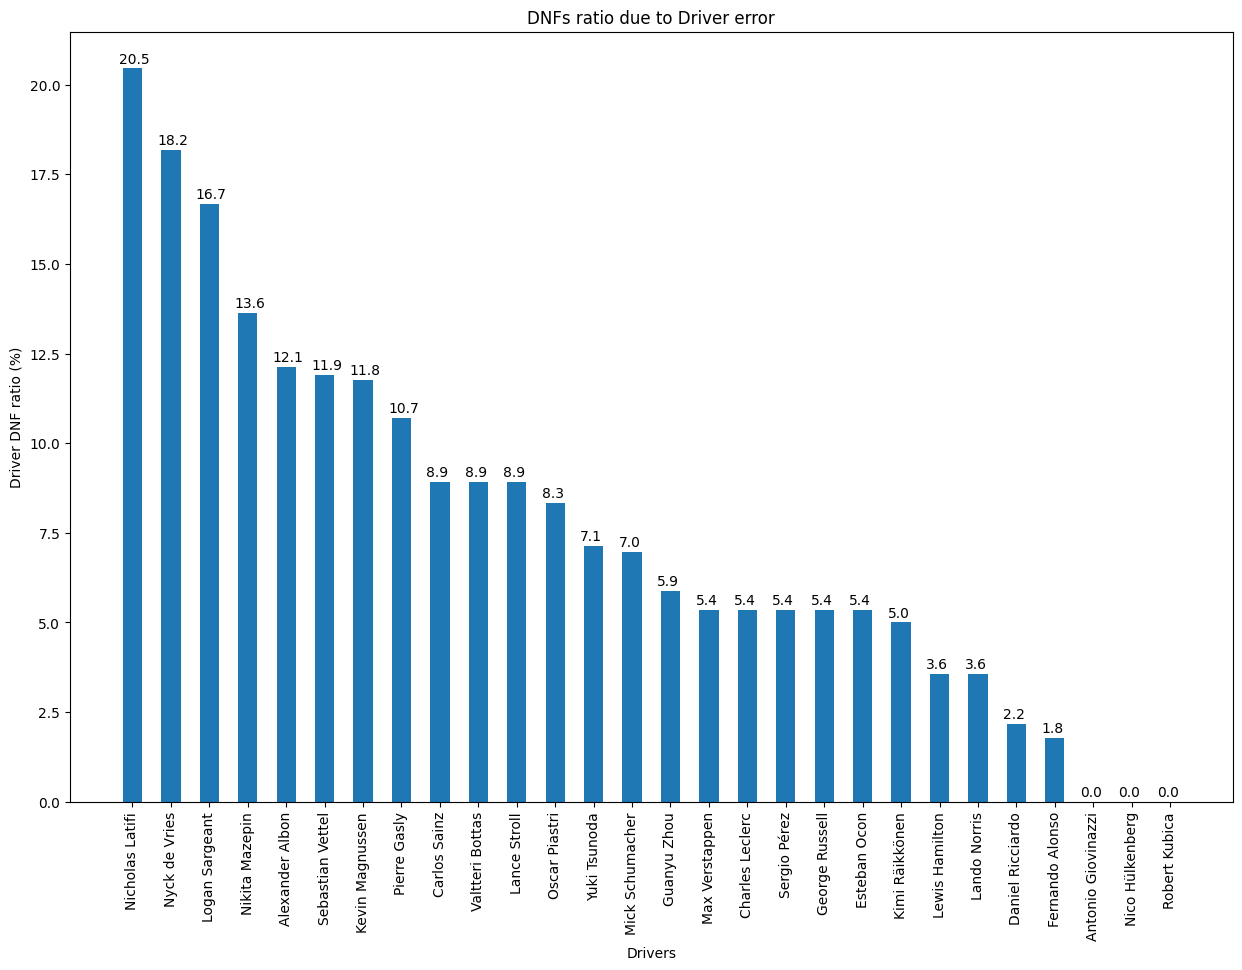

In [17]:
dnf_by_driver= data.groupby('driver_name').sum()['driver_dnf']
drivers_race_entered = data.groupby('driver_name').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver*100/drivers_race_entered).sort_values(ascending=False)
plt.figure(figsize=(15,10))
bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Driver DNF ratio (%)')
plt.title('DNFs ratio due to Driver error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}')
plt.show()

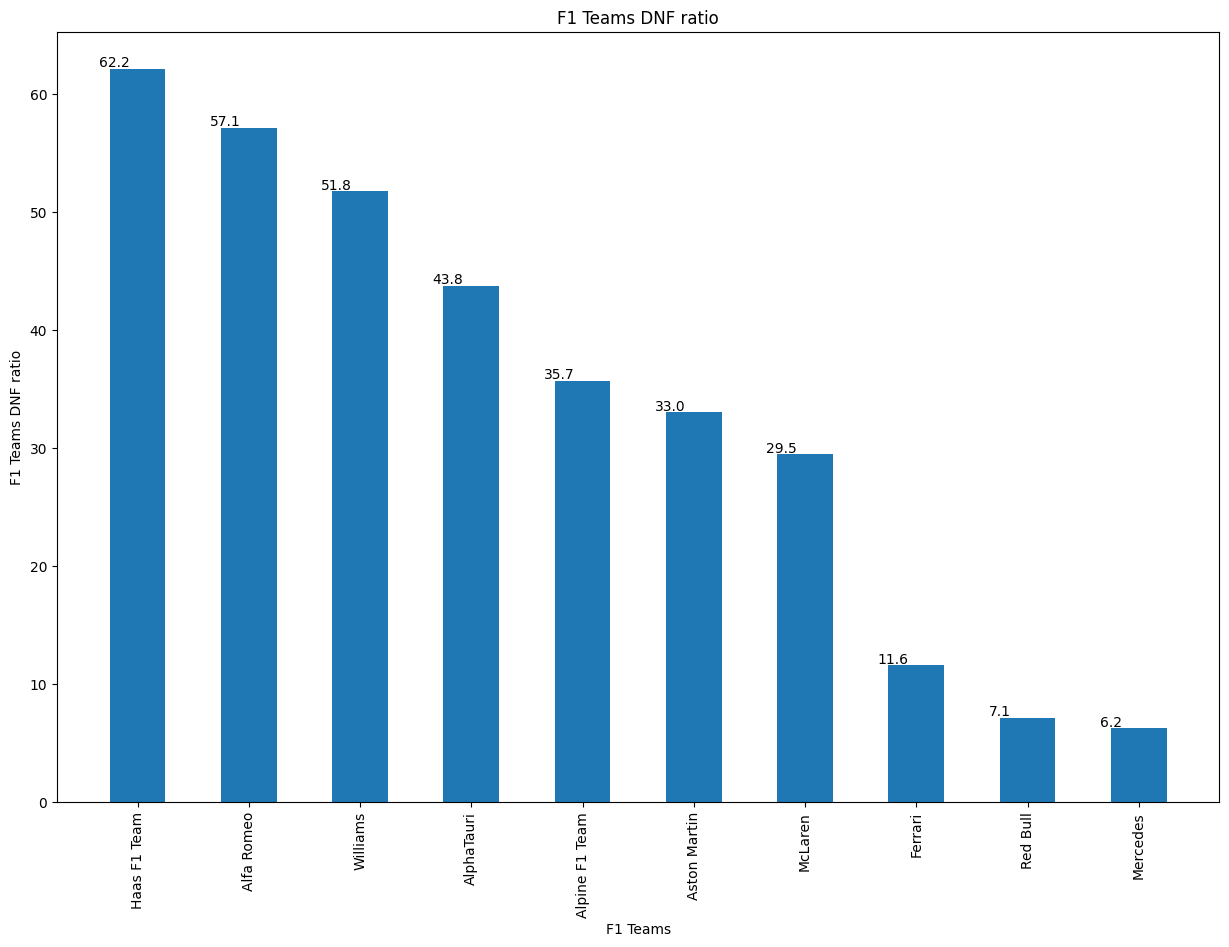

In [18]:
dnf_by_constructor = data.groupby('constructor').sum()['const_dnf']
constructor_race_entered = data.groupby('constructor').count()['const_dnf']
constructor_dnf_ratio = (dnf_by_constructor*100/constructor_race_entered).sort_values(ascending=False)
plt.figure(figsize=(15,10))
bars = plt.bar(x=constructor_dnf_ratio.index,height=constructor_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('F1 Teams')
plt.ylabel('F1 Teams DNF ratio')
plt.title('F1 Teams DNF ratio')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}')
plt.show()

In [19]:
driver_confidence = 1 - (dnf_by_driver/drivers_race_entered)
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))


In [20]:
driver_confidence_dict

{'Alexander Albon': 0.8787878787878788,
 'Antonio Giovinazzi': 1.0,
 'Carlos Sainz': 0.9107142857142857,
 'Charles Leclerc': 0.9464285714285714,
 'Daniel Ricciardo': 0.9782608695652174,
 'Esteban Ocon': 0.9464285714285714,
 'Fernando Alonso': 0.9821428571428571,
 'George Russell': 0.9464285714285714,
 'Guanyu Zhou': 0.9411764705882353,
 'Kevin Magnussen': 0.8823529411764706,
 'Kimi Räikkönen': 0.95,
 'Lance Stroll': 0.9107142857142857,
 'Lando Norris': 0.9642857142857143,
 'Lewis Hamilton': 0.9642857142857143,
 'Logan Sargeant': 0.8333333333333334,
 'Max Verstappen': 0.9464285714285714,
 'Mick Schumacher': 0.9302325581395349,
 'Nicholas Latifi': 0.7954545454545454,
 'Nico Hülkenberg': 1.0,
 'Nikita Mazepin': 0.8636363636363636,
 'Nyck de Vries': 0.8181818181818181,
 'Oscar Piastri': 0.9166666666666666,
 'Pierre Gasly': 0.8928571428571429,
 'Robert Kubica': 1.0,
 'Sebastian Vettel': 0.8809523809523809,
 'Sergio Pérez': 0.9464285714285714,
 'Valtteri Bottas': 0.9107142857142857,
 'Yuki T

In [21]:
const_confidence = 1 - (dnf_by_constructor/constructor_race_entered)
const_confidence_dict = dict(zip(const_confidence.index,const_confidence))

In [22]:
const_confidence_dict

{'Alfa Romeo': 0.4285714285714286,
 'AlphaTauri': 0.5625,
 'Alpine F1 Team': 0.6428571428571428,
 'Aston Martin': 0.6696428571428572,
 'Ferrari': 0.8839285714285714,
 'Haas F1 Team': 0.3783783783783784,
 'McLaren': 0.7053571428571428,
 'Mercedes': 0.9375,
 'Red Bull': 0.9285714285714286,
 'Williams': 0.4821428571428571}

In [23]:
data['driver_confidence'] = data['driver_name'].apply(lambda x:driver_confidence_dict[x])
data['const_reliability'] = data['constructor'].apply(lambda x:const_confidence_dict[x])

In [24]:
data.head()

,year,quali_pos,driver_dnf,const_dnf,finish_pos,driver_nat,driver_name,constructor,const_nat,GP_name,country,driver_home,const_home,driver_confidence,const_reliability
97,2022,20,0,0,16,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0,0.878788,0.482143
98,2023,8,1,0,8,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0,0.878788,0.482143
100,2022,18,0,1,19,Can,Nicholas Latifi,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0,0.795455,0.482143
101,2023,18,1,0,18,Ame,Logan Sargeant,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0,0.833333,0.482143
140,2022,7,0,0,7,Aus,Daniel Ricciardo,McLaren,Bri,Albert Park Grand Prix Circuit,Aus,1,0,0.978261,0.705357


In [25]:
def position_index(x):
    if x == 1:
        return 1
    if x > 4:
        return 2
    if x > 11:
        return 3
    else:
        return 4

In [26]:
x_d = data[['GP_name','driver_name','quali_pos','driver_confidence','driver_home','const_home']]
y_d = data['finish_pos'].apply(lambda x: position_index(x))

In [27]:
x_d

,GP_name,driver_name,quali_pos,driver_confidence,driver_home,const_home
97,Albert Park Grand Prix Circuit,Alexander Albon,20,0.878788,0,0
98,Albert Park Grand Prix Circuit,Alexander Albon,8,0.878788,0,0
100,Albert Park Grand Prix Circuit,Nicholas Latifi,18,0.795455,0,0
101,Albert Park Grand Prix Circuit,Logan Sargeant,18,0.833333,0,0
140,Albert Park Grand Prix Circuit,Daniel Ricciardo,7,0.978261,1,0
...,...,...,...,...,...,...
9800,Losail International Circuit,Antonio Giovinazzi,18,1.000000,0,0
9801,Losail International Circuit,Mick Schumacher,19,0.930233,0,0
9802,Losail International Circuit,Nikita Mazepin,20,0.863636,0,0
9803,Losail International Circuit,Pierre Gasly,2,0.892857,0,0


In [28]:
y_d

97      2
98      2
100     2
101     2
140     2
       ..
9800    2
9801    2
9802    2
9803    4
9804    2
Name: finish_pos, Length: 1119, dtype: int64

In [29]:
sc = StandardScaler()
le = LabelEncoder()

x_d['GP_name']=le.fit_transform(x_d['GP_name'])
x_d['driver_name'] = le.fit_transform(x_d['driver_name'])
x_d

,GP_name,driver_name,quali_pos,driver_confidence,driver_home,const_home
97,0,0,20,0.878788,0,0
98,0,0,8,0.878788,0,0
100,0,17,18,0.795455,0,0
101,0,14,18,0.833333,0,0
140,0,4,7,0.978261,1,0
...,...,...,...,...,...,...
9800,18,1,18,1.000000,0,0
9801,18,16,19,0.930233,0,0
9802,18,19,20,0.863636,0,0
9803,18,22,2,0.892857,0,0


In [30]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name_dri = []
for model in models:
    cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    result = cross_val_score(model,x_d,y_d,cv=cv,scoring='accuracy')
    print(result)
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name_dri.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

[0.82589286 0.84821429 0.86160714 0.85714286 0.86547085]
LogisticRegression : 0.8516655989750159
[0.89285714 0.91071429 0.9375     0.90178571 0.91928251]
DecisionTreeClassifier : 0.9124279308135812


[0.91517857 0.95089286 0.95089286 0.91964286 0.95515695]
RandomForestClassifier : 0.9383528187059577
[0.82142857 0.86607143 0.89285714 0.86160714 0.88340807]
SVC : 0.865074471492633
[0.79464286 0.87053571 0.87053571 0.80803571 0.85650224]
GaussianNB : 0.8400504484304931
[0.85267857 0.85714286 0.88839286 0.86607143 0.88789238]
KNeighborsClassifier : 0.8704356181934658


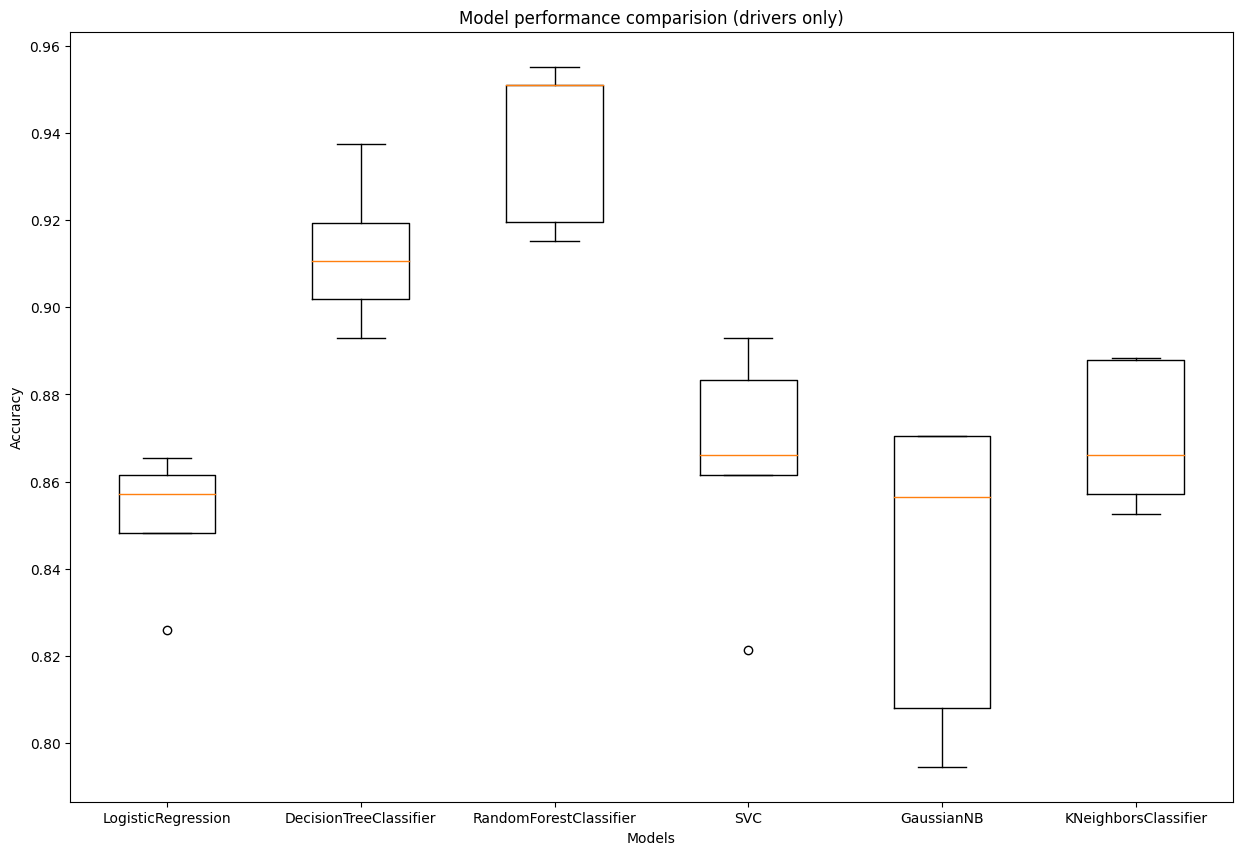

In [31]:

plt.figure(figsize=(15,10))
plt.boxplot(x=results_dri,labels=name_dri)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (drivers only)')
plt.show()



In [32]:
x_c = data[['GP_name','driver_name','quali_pos','const_reliability','driver_home','const_home']]
y_c = data['finish_pos'].apply(lambda x: position_index(x))


In [33]:
x_c

,GP_name,driver_name,quali_pos,const_reliability,driver_home,const_home
97,Albert Park Grand Prix Circuit,Alexander Albon,20,0.482143,0,0
98,Albert Park Grand Prix Circuit,Alexander Albon,8,0.482143,0,0
100,Albert Park Grand Prix Circuit,Nicholas Latifi,18,0.482143,0,0
101,Albert Park Grand Prix Circuit,Logan Sargeant,18,0.482143,0,0
140,Albert Park Grand Prix Circuit,Daniel Ricciardo,7,0.705357,1,0
...,...,...,...,...,...,...
9800,Losail International Circuit,Antonio Giovinazzi,18,0.428571,0,0
9801,Losail International Circuit,Mick Schumacher,19,0.378378,0,0
9802,Losail International Circuit,Nikita Mazepin,20,0.378378,0,0
9803,Losail International Circuit,Pierre Gasly,2,0.562500,0,0


In [34]:
x_c['GP_name']=le.fit_transform(x_d['GP_name'])
x_c['driver_name'] = le.fit_transform(x_d['driver_name'])
x_c

,GP_name,driver_name,quali_pos,const_reliability,driver_home,const_home
97,0,0,20,0.482143,0,0
98,0,0,8,0.482143,0,0
100,0,17,18,0.482143,0,0
101,0,14,18,0.482143,0,0
140,0,4,7,0.705357,1,0
...,...,...,...,...,...,...
9800,18,1,18,0.428571,0,0
9801,18,16,19,0.378378,0,0
9802,18,19,20,0.378378,0,0
9803,18,22,2,0.562500,0,0


In [35]:
y_c

97      2
98      2
100     2
101     2
140     2
       ..
9800    2
9801    2
9802    2
9803    4
9804    2
Name: finish_pos, Length: 1119, dtype: int64

In [36]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_const = []
results_const = []
name_const = []
for model in models:
    cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    result = cross_val_score(model,x_d,y_d,cv=cv,scoring='accuracy')
    print(result)
    mean_results_const.append(result.mean())
    results_const.append(result)
    name_const.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

[0.82589286 0.84821429 0.86160714 0.85714286 0.86547085]
LogisticRegression : 0.8516655989750159
[0.88839286 0.90625    0.94642857 0.90178571 0.93273543]
DecisionTreeClassifier : 0.9151185137732224
[0.91517857 0.95089286 0.95089286 0.91964286 0.95515695]
RandomForestClassifier : 0.9383528187059577
[0.82142857 0.86607143 0.89285714 0.86160714 0.88340807]
SVC : 0.865074471492633
[0.79464286 0.87053571 0.87053571 0.80803571 0.85650224]
GaussianNB : 0.8400504484304931
[0.85267857 0.85714286 0.88839286 0.86607143 0.88789238]
KNeighborsClassifier : 0.8704356181934658


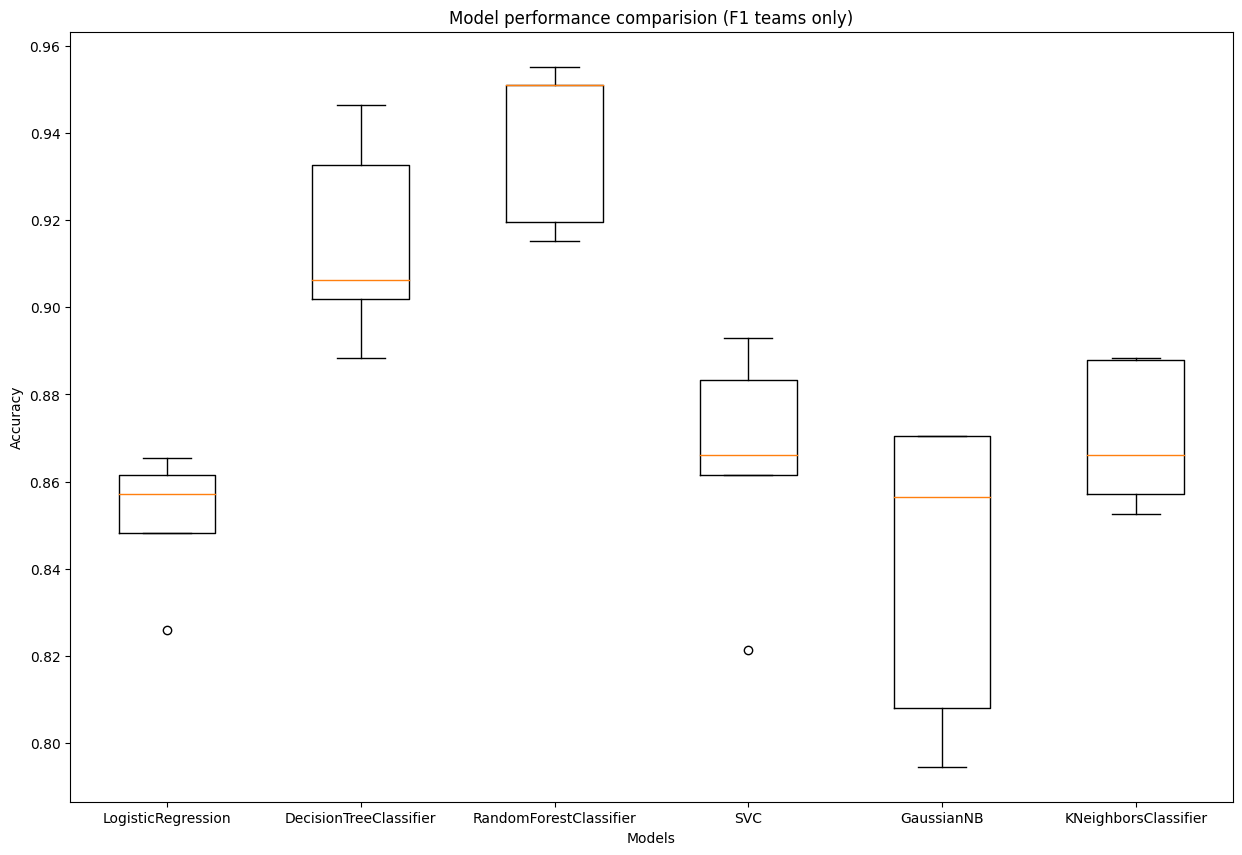

In [37]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_const,labels=name_const)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (F1 teams only)')
plt.show()


In [38]:
x_final = data[['GP_name','driver_name','quali_pos','driver_confidence','const_reliability','driver_home','const_home']]
y_final = data['finish_pos'].apply(lambda x: position_index(x))

In [39]:
x_final

,GP_name,driver_name,quali_pos,driver_confidence,const_reliability,driver_home,const_home
97,Albert Park Grand Prix Circuit,Alexander Albon,20,0.878788,0.482143,0,0
98,Albert Park Grand Prix Circuit,Alexander Albon,8,0.878788,0.482143,0,0
100,Albert Park Grand Prix Circuit,Nicholas Latifi,18,0.795455,0.482143,0,0
101,Albert Park Grand Prix Circuit,Logan Sargeant,18,0.833333,0.482143,0,0
140,Albert Park Grand Prix Circuit,Daniel Ricciardo,7,0.978261,0.705357,1,0
...,...,...,...,...,...,...,...
9800,Losail International Circuit,Antonio Giovinazzi,18,1.000000,0.428571,0,0
9801,Losail International Circuit,Mick Schumacher,19,0.930233,0.378378,0,0
9802,Losail International Circuit,Nikita Mazepin,20,0.863636,0.378378,0,0
9803,Losail International Circuit,Pierre Gasly,2,0.892857,0.562500,0,0


In [40]:
x_final['GP_name']=le.fit_transform(x_d['GP_name'])
x_final['driver_name'] = le.fit_transform(x_d['driver_name'])
x_final

,GP_name,driver_name,quali_pos,driver_confidence,const_reliability,driver_home,const_home
97,0,0,20,0.878788,0.482143,0,0
98,0,0,8,0.878788,0.482143,0,0
100,0,17,18,0.795455,0.482143,0,0
101,0,14,18,0.833333,0.482143,0,0
140,0,4,7,0.978261,0.705357,1,0
...,...,...,...,...,...,...,...
9800,18,1,18,1.000000,0.428571,0,0
9801,18,16,19,0.930233,0.378378,0,0
9802,18,19,20,0.863636,0.378378,0,0
9803,18,22,2,0.892857,0.562500,0,0


In [41]:
y_final

97      2
98      2
100     2
101     2
140     2
       ..
9800    2
9801    2
9802    2
9803    4
9804    2
Name: finish_pos, Length: 1119, dtype: int64

In [42]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_combined = []
results_combined = []
name_combined = []
for model in models:
    cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    result = cross_val_score(model,x_d,y_d,cv=cv,scoring='accuracy')
    print(result)
    mean_results_combined.append(result.mean())
    results_combined.append(result)
    name_combined.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

[0.82589286 0.84821429 0.86160714 0.85714286 0.86547085]
LogisticRegression : 0.8516655989750159
[0.87946429 0.91071429 0.94196429 0.90178571 0.92376682]
DecisionTreeClassifier : 0.9115390775144139
[0.91071429 0.94642857 0.95089286 0.91964286 0.95067265]
RandomForestClassifier : 0.9356702434336963
[0.82142857 0.86607143 0.89285714 0.86160714 0.88340807]
SVC : 0.865074471492633
[0.79464286 0.87053571 0.87053571 0.80803571 0.85650224]
GaussianNB : 0.8400504484304931
[0.85267857 0.85714286 0.88839286 0.86607143 0.88789238]
KNeighborsClassifier : 0.8704356181934658


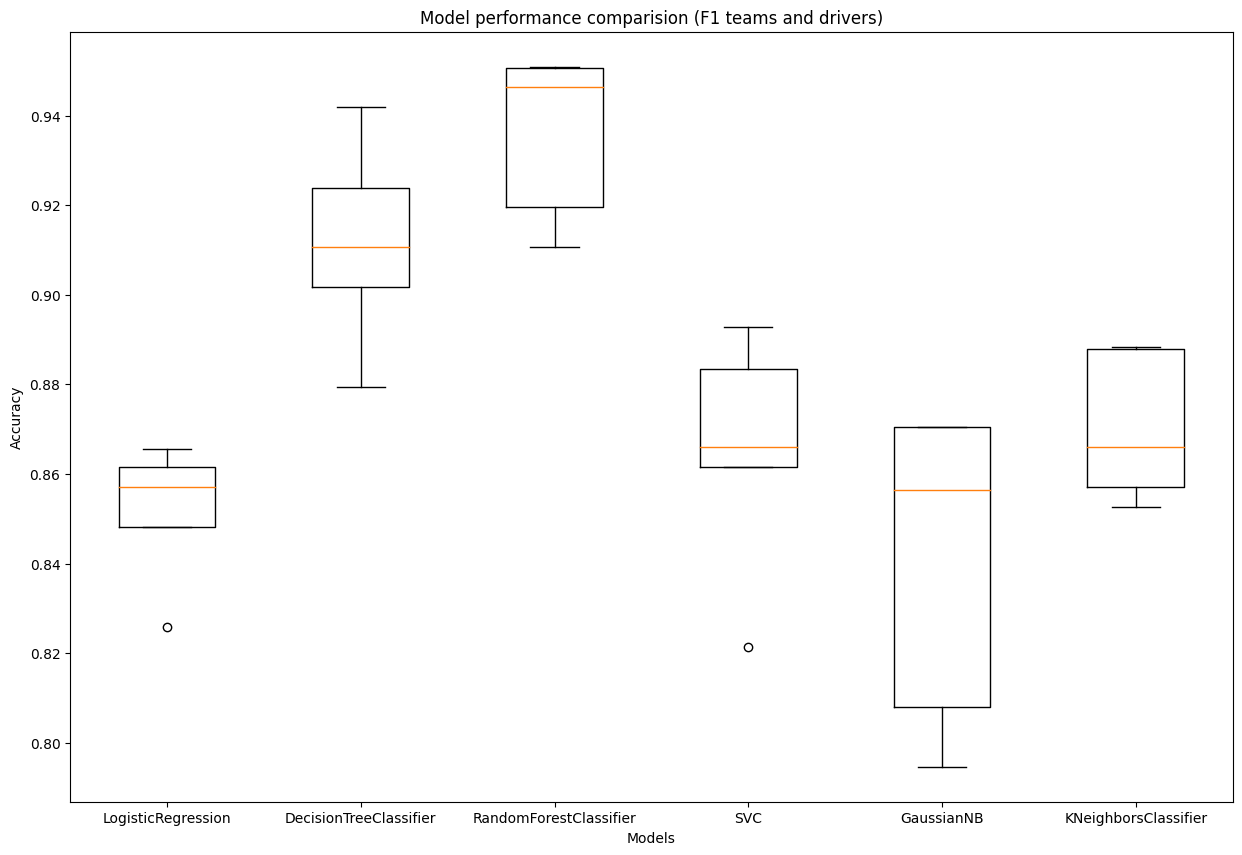

In [43]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_combined,labels=name_combined)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (F1 teams and drivers)')
plt.show()

# 6. References

[wikipedia_f1]: https://en.wikipedia.org/wiki/Formula_One "Wikipedia"